# Iris Classification

Classify iris flowers (Setosa, Versicolor, Virginica) using sepal/petal measurements.

In [1]:
# Import Libraries Required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from scipy.stats import uniform, randint

In [2]:
# Setting styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the data set
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Creating a data frame for exploration
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2:'virginica'})

print("Dataset shape:", X.shape)
print("Feature names:", feature_names)
print("Target names:", target_names)
df.head()

Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Basic Statistics

In [3]:
print("Dataset Information:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nClass distribution:")
print(df['species_name'].value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%            

## Pairplot with seaborn

<Figure size 1200x800 with 0 Axes>

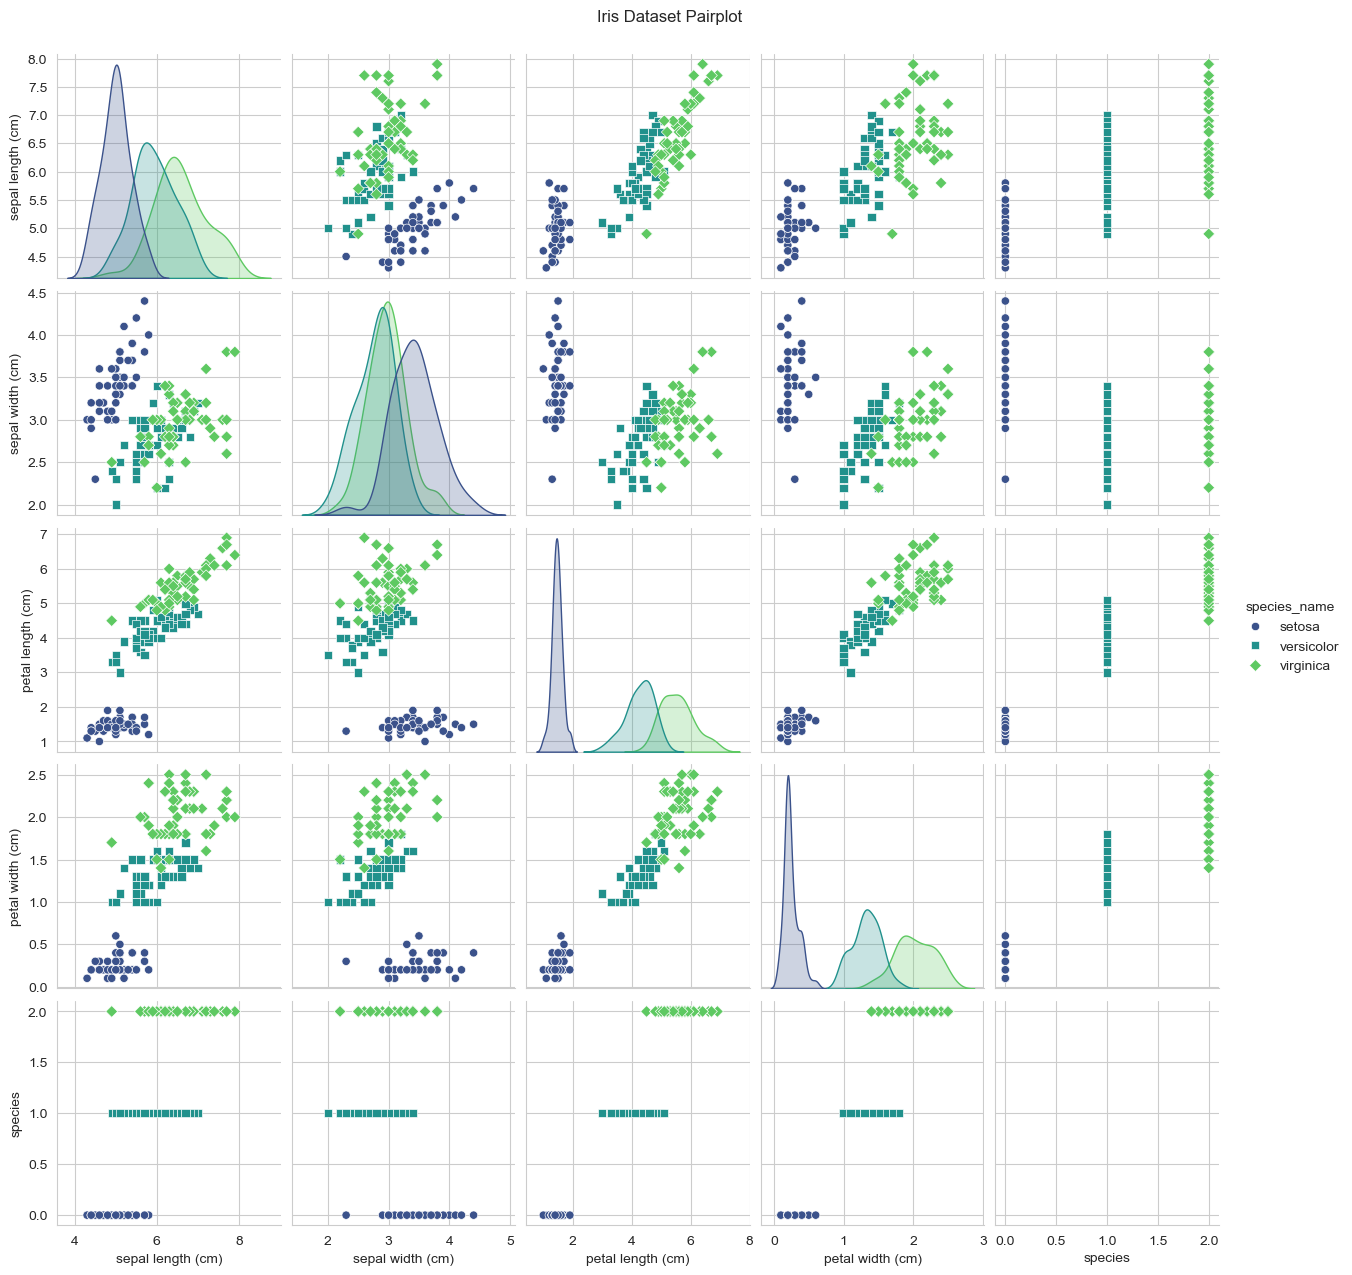

In [4]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species_name', palette='viridis', markers=['o', 's', 'D'])
plt.suptitle('Iris Dataset Pairplot', y=1.02)
plt.show()

## Correlation heatmap

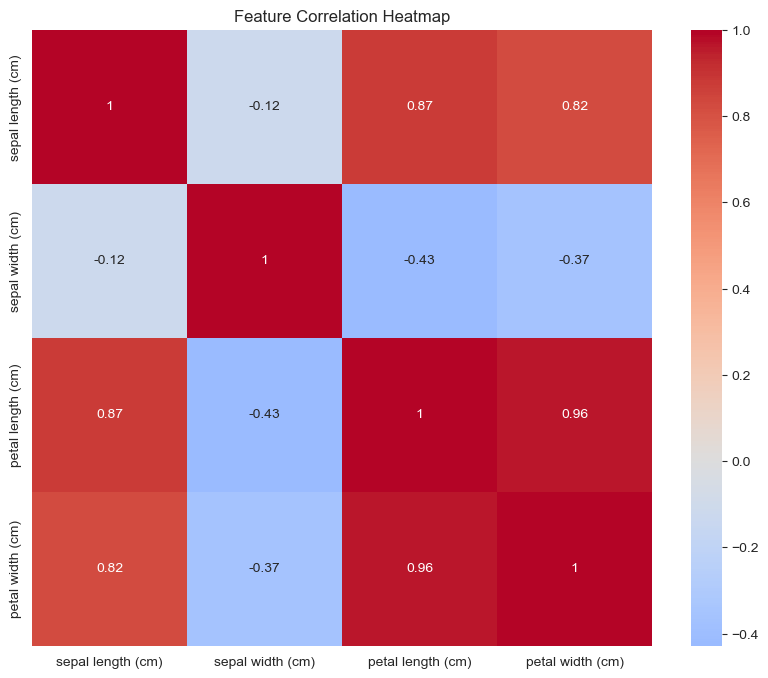

In [5]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(['species', 'species_name'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

## Interpreting the correlation matrix

Looking at these correlation matrix we can interpret as following.

### Strong Positive Correlation

- petal length vs petal width -> 0.96 (96%)
    - Which means that flowers with longer petals will almost always have wider petals

- petal length vs sepal length -> 0.87 (87%)
    - Which means that flowers with longer petals tend to have longer sepals
 
- petal width vs sepal length -> 0.82 (82%)
    - Which means that flowers with wider petals tend to have longer sepals
 
**So we can conclude that these three features move together strongly**

### Weak Negative Correlation

- petal length vs sepal width -> -0.43 (-43%)
    - Which means flowers with wider sepals tend to have narrow petals
 
- petal width vs sepal width -> -0.37 (-37%)
    - Which means flowers with wider sepals tend to have shorter petals
 
### Very Weak Correlation

- sepal length vs sepal width -> -0.12 (-12%)
    - This is a very weak correlation which means these are almost unrelated

## Plotting

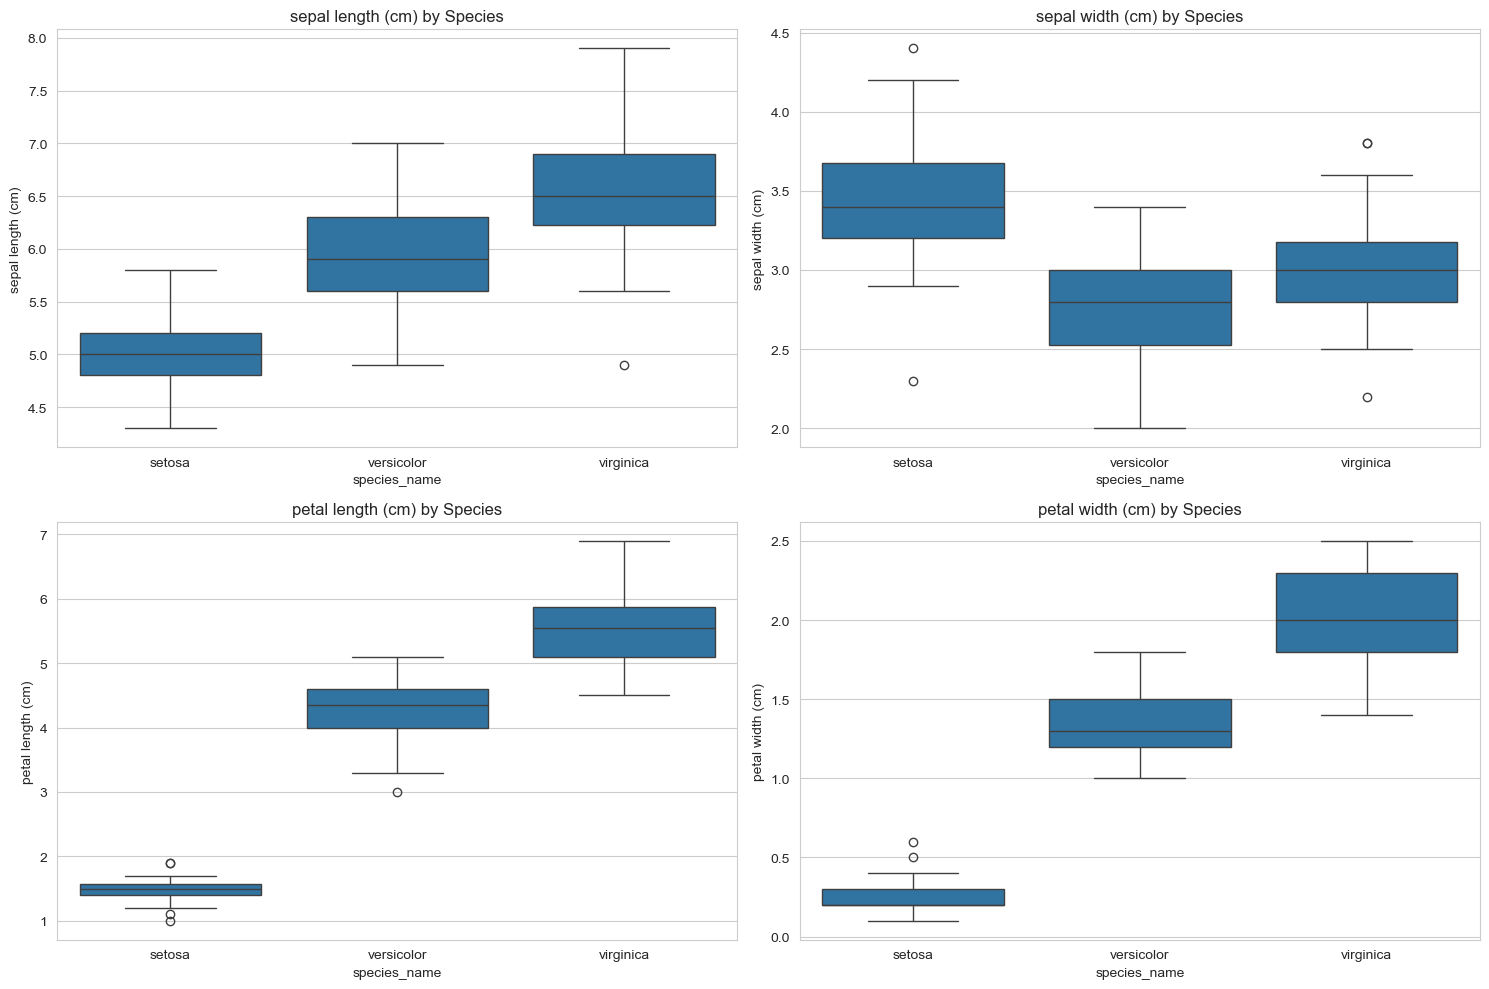

In [6]:
# Box plots for each feature by species
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = feature_names

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.boxplot(x='species_name', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Species')

plt.tight_layout()
plt.show()

## Model Training and Evaluation

In [7]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 120
Test set size: 30


In [8]:
# Training LogisticRegression model
log_reg = LogisticRegression(multi_class="multinomial", max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9333


C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Confusion Matrix

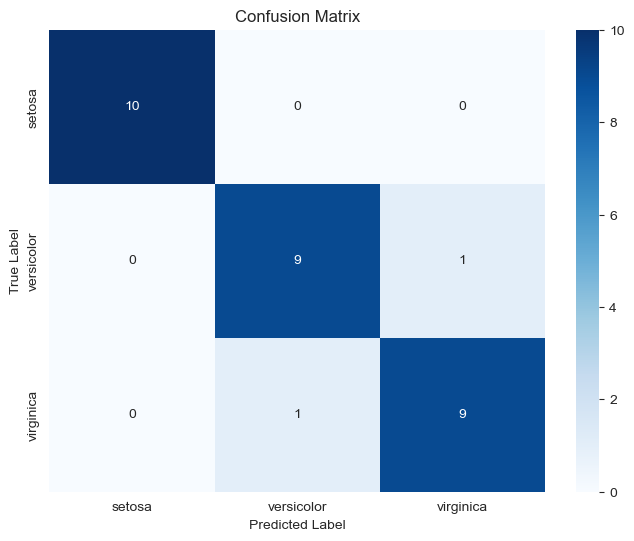

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Classification Report

In [10]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Cross validation

In [11]:
from sklearn.model_selection import cross_validate

# Cross-Validation Evaluation
def evaluate_with_cv(model, X, y, cv=5):
    """Evaluate model using cross-validation with multiple metrics"""
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision_macro',
        'recall': 'recall_macro', 
        'f1': 'f1_macro'
    }
    
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring)
    
    print("Cross-Validation Results:")
    print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std() * 2:.4f})")
    print(f"Mean Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std() * 2:.4f})")
    print(f"Mean Recall: {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std() * 2:.4f})")
    print(f"Mean F1-Score: {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std() * 2:.4f})")
    
    return cv_results

# Evaluate baseline model with CV
print("Baseline Logistic Regression CV Evaluation:")
cv_results_baseline = evaluate_with_cv(log_reg, X_train_scaled, y_train)

Baseline Logistic Regression CV Evaluation:


C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\l

Cross-Validation Results:
Mean Accuracy: 0.9583 (+/- 0.0527)
Mean Precision: 0.9644 (+/- 0.0423)
Mean Recall: 0.9583 (+/- 0.0527)
Mean F1-Score: 0.9580 (+/- 0.0535)


## Hyperparameter Tuning

In [12]:
# Randomized Search for broader parameter exploration
param_dist = {
    'C': uniform(0.001, 1000),  # log-uniform distribution
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': randint(100, 2000),
    'penalty': ['l2', 'none'],
    'class_weight': [None, 'balanced']
}

# Use Stratified K-Fold for better class distribution
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    LogisticRegression(multi_class='multinomial', random_state=42),
    param_dist,
    n_iter=50,  # Number of parameter combinations to try
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_scaled, y_train)

print("Best parameters (Randomized):", random_search.best_params_)
print("Best cross-validation score (Randomized): {:.4f}".format(random_search.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters (Randomized): {'C': np.float64(374.54111884736244), 'class_weight': None, 'max_iter': 1394, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score (Randomized): 0.9667


C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
175 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Raffael\miniconda3\envs\iris-project\

In [13]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    LogisticRegression(multi_class='multinomial', random_state=42),
    param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'C': 10, 'class_weight': None, 'max_iter': 100, 'solver': 'newton-cg'}
Best cross-validation score: 0.9667


C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Raffael\miniconda3\envs\iris-project

In [14]:
# Compare all models
best_grid_model = grid_search.best_estimator_
best_random_model = random_search.best_estimator_

models = {
    'Baseline': log_reg,
    'GridSearch Best': best_grid_model,
    'RandomSearch Best': best_random_model
}

print("Model Comparison:")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    cv_accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    print(f"{name}: Test Accuracy = {test_accuracy:.4f}, CV Accuracy = {cv_accuracy:.4f}")

Model Comparison:
Baseline: Test Accuracy = 0.9333, CV Accuracy = 0.9583
GridSearch Best: Test Accuracy = 1.0000, CV Accuracy = 0.9667
RandomSearch Best: Test Accuracy = 1.0000, CV Accuracy = 0.9667


C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Raffael\miniconda3\envs\iris-project\Lib\site-packages\sklearn\l

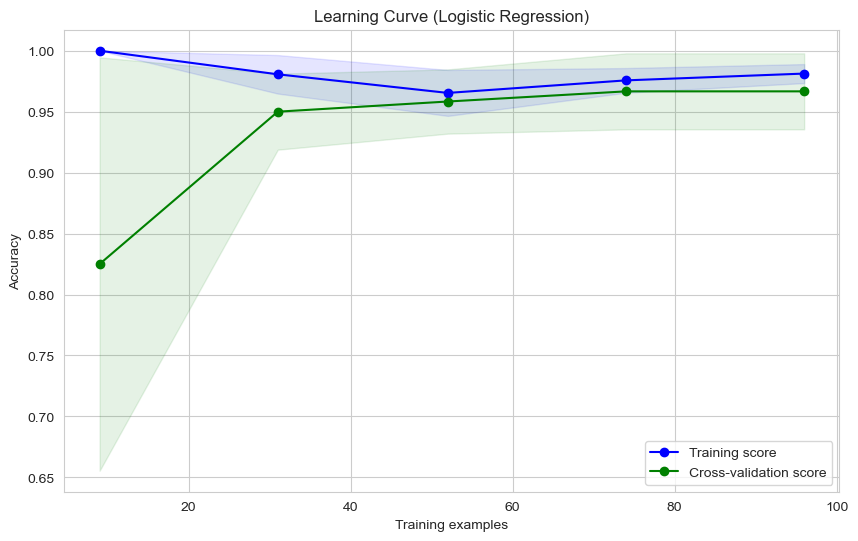

In [15]:
# Learning Curve Analysis
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    """Plot learning curves"""
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
    
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curve for best model
plot_learning_curve(best_grid_model, "Learning Curve (Logistic Regression)", X_train_scaled, y_train, cv=cv_strategy)

## Feature Importance analysis

Feature Importance:
             feature  importance_setosa  importance_versicolor  \
0  sepal length (cm)          -1.088945               0.536337   
1   sepal width (cm)           1.024208              -0.360487   
2  petal length (cm)          -1.799056              -0.204074   
3   petal width (cm)          -1.686228              -0.807957   

   importance_virginica  
0              0.552608  
1             -0.663721  
2              2.003130  
3              2.494185  


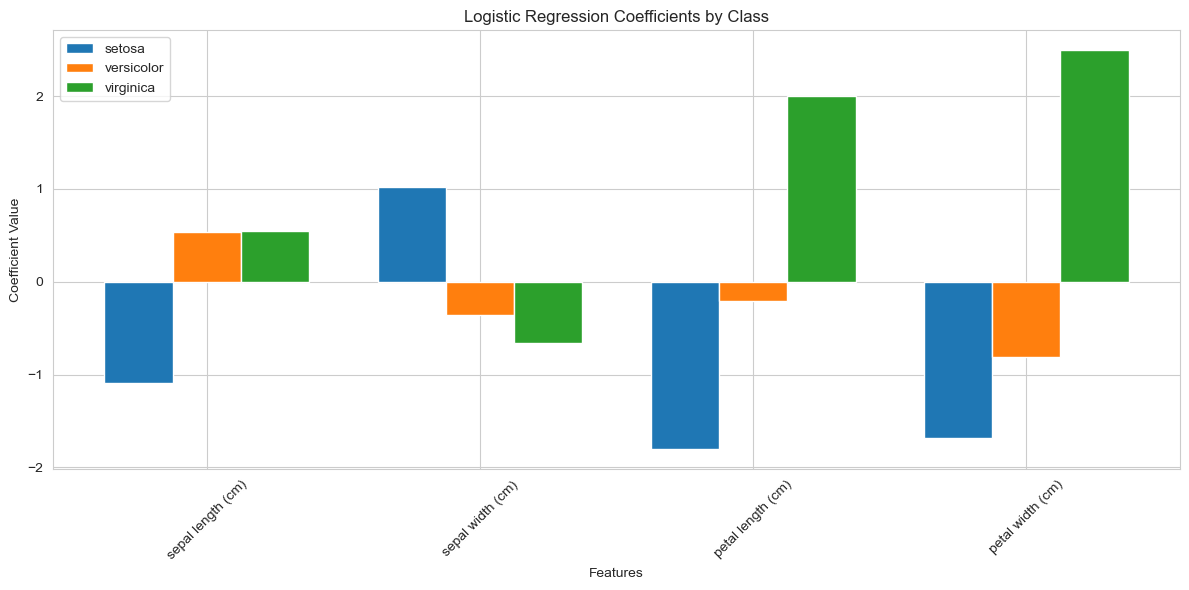

In [16]:
# Feature importance analysis
coefficients = log_reg.coef_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance_setosa': coefficients[0],
    'importance_versicolor': coefficients[1],
    'importance_virginica': coefficients[2]
})

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
for i, species in enumerate(target_names):
    plt.bar(np.arange(len(feature_names)) + i*0.25, coefficients[i], width=0.25, label=species)

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients by Class')
plt.xticks(np.arange(len(feature_names)) + 0.25, feature_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Interpretting Feature importance

1. Setosa
    - sepal length (cm): -1.09  ← Negative: Longer sepals make Setosa LESS likely
    - sepal width (cm):  +1.02  ← Positive: Wider sepals make Setosa MORE likely  
    - petal length (cm): -1.80  ← Very Negative: Longer petals make Setosa MUCH less likely
    - petal width (cm):  -1.69  ← Very Negative: Wider petals make Setosa MUCH less likely
2. Versicolor
    - sepal length (cm): +0.54  ← Slightly Positive: Longer sepals help Versicolor
    - sepal width (cm):  -0.36  ← Slightly Negative: Wider sepals hurt Versicolor
    - petal length (cm): -0.20  ← Mildly Negative: Very long petals not typical for Versicolor  
    - petal width (cm):  -0.81  ← Negative: Very wide petals not typical for Versicolor

Feature Importance:
             feature  importance_setosa  importance_versicolor  \
0  sepal length (cm)          -1.783974               1.132188   
1   sepal width (cm)           1.711112              -0.292049   
2  petal length (cm)          -3.292676              -1.148148   
3   petal width (cm)          -3.172757              -1.417930   

   importance_virginica  
0              0.651786  
1             -1.419063  
2              4.440824  
3              4.590686  


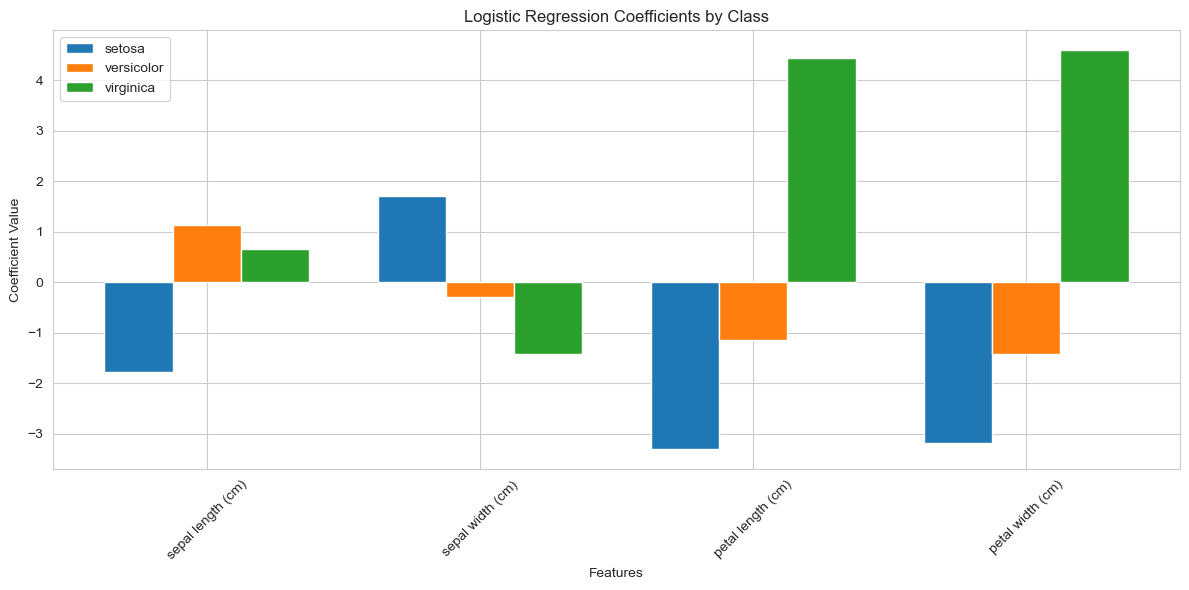

In [17]:
coefficients = best_grid_model.coef_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance_setosa': coefficients[0],
    'importance_versicolor': coefficients[1],
    'importance_virginica': coefficients[2]
})

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
for i, species in enumerate(target_names):
    plt.bar(np.arange(len(feature_names)) + i*0.25, coefficients[i], width=0.25, label=species)

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients by Class')
plt.xticks(np.arange(len(feature_names)) + 0.25, feature_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()